In [ ]:
print("Hi Himik Let's start")

In [1]:
#!pip install opendatasets scikit-learn plotly folium --quiet

import opendatasets as od
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib
import plotly.express as px
%matplotlib inline
import pandas as pd
from zipfile import ZipFile
from warnings import filterwarnings
filterwarnings("ignore")
import numpy as np
np.random.seed(42)
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import classification_report



In [ ]:
url='https://www.kaggle.com/uciml/pima-indians-diabetes-database'
od.download(url,force=True)

In [2]:
cd Diabetes Prediction

[WinError 2] The system cannot find the file specified: 'Diabetes Prediction'
c:\Users\Simik\OneDrive\Documents\DPfinal\Diabetes Prediction


In [3]:
pd.options.display.max_columns=200
pd.options.display.max_rows=200

In [4]:
df=pd.read_csv('diabetes.csv')

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
"""Replacing the 0 values in the dataset with null values"""

df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)
df.isnull().sum()

In [ ]:
"""Replotting the heap map of null values using Seaborn"""
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
X=df.drop('Outcome',axis=1)
X=X.drop('DiabetesPedigreeFunction',axis=1)

In [ ]:
Y=df['Outcome']

In [ ]:
X.replace(to_replace=0,value=X.mean(),inplace=True)
df.isnull().sum()

In [ ]:
X.shape

In [ ]:
"""Plotting the heat map of correlation matrix"""
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap='Blues', cbar=False)

### As Blood Pressure Does not contribute significantly , it can be dropped

In [ ]:
# Comparing Glucose with the Outcome
pd.crosstab(X.Glucose[::15],df.Outcome).plot(kind="bar",figsize=(18,8),color=["Red","green"])
plt.ylabel("People");
plt.xticks(rotation=0);
plt.legend(['Non diabetic', 'Diabetic']);

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,orient='h')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
# Scatter with outcome 1 
plt.scatter(X.Age[df.Outcome==1],X.BloodPressure[df.Outcome==1],c="Red");
# Scatter with outcome 0
plt.scatter(X.Age[df.Outcome==0],X.BloodPressure[df.Outcome==0],c="green");


plt.title("Diabetes in function of Age and Blood pressure")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.legend(["Diabetic","Non Diabetic"]);

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
fig.tight_layout(pad=3.0)
ax[0,0].set_title('Pregnancies')
ax[0,0].hist(X.Pregnancies[df.Outcome==1]);
ax[0,1].set_title('Glucose')
ax[0,1].hist(X.Glucose[df.Outcome==1]);
ax[1,0].set_title('BloodPressure')
ax[1,0].hist(X.BloodPressure[df.Outcome==1]);
ax[1,1].set_title('SkinThickness')
ax[1,1].hist(X.SkinThickness[df.Outcome==1]);
ax[2,0].set_title('Insulin')
ax[2,0].hist(X.Insulin[df.Outcome==1]);

ax[3,0].set_title('BMI')
ax[3,0].hist(X.BMI[df.Outcome==1]);
ax[3,1].set_title('Diabetes PedigreeFunction')
ax[3,1].hist(df.DiabetesPedigreeFunction[df.Outcome==1]);
ax[2,1].set_title('Age')
ax[2,1].hist(X.Age[df.Outcome==1]);

In [ ]:
#HeatMap visualisation for Corr()
corr_matrix = df.corr()
fig =plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True, linewidth=5 ,fmt=".2f",cmap="gist_earth")

In [ ]:
df["Outcome"].value_counts().plot(kind="bar",color=["Blue","Red"])
plt.xticks(np.arange(2),('No Diabetes','Diabetes'),rotation=0)

In [ ]:
X.drop("BloodPressure",axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=4)

In [ ]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

In [ ]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [ ]:
model = LogisticRegression(lr=0.1, num_iter=300000)
print(model)
%time model.fit(X, Y)
preds=model.predict(X)

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0,solver='liblinear')
lr.fit(X_train_std,Y_train)
from sklearn.metrics import accuracy_score
lm=lr.score(X_test_std,Y_test)
print(lm*100)

In [ ]:
Y_pred=lr.predict(X_test_std)

In [ ]:
print(classification_report(Y_test,Y_pred))

In [ ]:
feature_dict = dict(zip(X.columns, list(lr.coef_[0])))
feature_dict
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [ ]:
df.head(1)

In [ ]:
X.columns

In [ ]:
input_data = (6,148,35,0,33.6,50)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = std.transform(input_data_reshaped)
print(std_data)

prediction = lr.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

In [ ]:
sns.set(font_scale=2)
sns.heatmap(confusion_matrix(Y_test,Y_pred), annot=True,cbar=False, fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label");

In [ ]:
from sklearn import svm
classifier=svm.SVC(kernel='linear')
classifier.fit(X_train_std,Y_train)

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train_std)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test_std)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

In [ ]:
print(classification_report(Y_test,X_test_prediction))

In [ ]:
sns.set(font_scale=2)
import seaborn as sns
sns.heatmap(confusion_matrix(Y_test,X_test_prediction), annot=True,cbar=False, fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label");

In [ ]:
input_data = (6,148,35,0,33.6,50)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = std.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

In [ ]:
#Let's use KNN Model 

In [ ]:
def distance(a,b):
  return np.sum((b-a)**2)**0.5


def knn(x,y,test,k=5):
    m = x.shape[0]
    
    d = []
    for i  in range(m):
        dist = distance(test,x[i])
        d.append((dist,y[i]))
    
    d = np.array(sorted(d))[:,1]
    d = d[:k]
    t =  np.unique(d,return_counts=True)
    idx = np.argmax(t[1])
    pred = int(t[0][idx])
        
    return pred

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
getting_number=np.arange(1,15)
train_accuracy = np.empty(len(getting_number))
test_accuracy = np.empty(len(getting_number))
for i, k in enumerate(getting_number):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    train_accuracy[i] = knn.score(X_train, Y_train)
    test_accuracy[i] = knn.score(X_test, Y_test)
    
plt.plot(getting_number, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(getting_number, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()
    

In [ ]:
# Actually we should use hyper parameter tuning to find the value of k 

In [ ]:
# accuracy score on the training data
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train_std, Y_train)
X_train_prediction = knn.predict(X_train_std)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

In [ ]:
# accuracy score on the testing data

X_test_prediction = knn.predict(X_test_std)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)


In [ ]:
print(classification_report(Y_test,X_test_prediction))


In [ ]:
sns.set(font_scale=2)
import seaborn as sns
sns.heatmap(confusion_matrix(Y_test,X_test_prediction), annot=True,cbar=False, fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label");

In [ ]:
input_data = (6,148,35,0,33.6,50)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = std.transform(input_data_reshaped)
print(std_data)

prediction = knn.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier()
classifier1 = classifier1.fit(X_train_std, Y_train)

In [ ]:
# accuracy score on the testing data

X_test_prediction = classifier1.predict(X_test_std)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)


In [ ]:
print(classification_report(Y_test,X_test_prediction))


In [ ]:
sns.set(font_scale=2)
import seaborn as sns
sns.heatmap(confusion_matrix(Y_test,X_test_prediction), annot=True,cbar=False, fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label");

In [ ]:
input_data = (6,148,35,0,33.6,50)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = std.transform(input_data_reshaped)
print(std_data)

prediction = classifier1.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(criterion = "gini", min_samples_leaf = 1, min_samples_split = 10,   n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train_std, Y_train)

In [ ]:
# accuracy score on the training data

X_train_prediction = random_forest.predict(X_train_std)
train_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the test data : ', train_data_accuracy)


In [ ]:
# accuracy score on the testing data

X_test_prediction = random_forest.predict(X_test_std)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)


In [ ]:
print(classification_report(Y_test,X_test_prediction))


In [ ]:
sns.set(font_scale=2)
import seaborn as sns
sns.heatmap(confusion_matrix(Y_test,X_test_prediction), annot=True,cbar=False, fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label");

In [ ]:
input_data = (6,148,35,0,33.6,50)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = std.transform(input_data_reshaped)
print(std_data)

prediction = random_forest.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

In [63]:
model_scores={'Logistic Regression':lr.score(X_test_std,Y_test),
             'KNN classifier':knn.score(X_test_std,Y_test),
             'Support Vector Machine':classifier.score(X_test_std,Y_test),
             'Random forest':random_forest.score(X_test_std,Y_test),
              'Decision tree':classifier1.score(X_test_std,Y_test),
              
             }

In [64]:
model_scores

{'Logistic Regression': 0.8246753246753247,
 'KNN classifier': 0.7987012987012987,
 'Support Vector Machine': 0.8116883116883117,
 'Random forest': 0.7662337662337663,
 'Decision tree': 0.6623376623376623}

In [65]:
'''Here, we can see that Logistic regression and SVM
have the best accuracy.
'''


'Here, we can see that Logistic regression and SVM\nhave the best accuracy.\n'

In [69]:
#Classification Report of Logistic Regression
Pred = lr.predict(X_test_std)
print(classification_report(Y_test,Pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       102
           1       0.79      0.65      0.72        52

    accuracy                           0.82       154
   macro avg       0.81      0.78      0.79       154
weighted avg       0.82      0.82      0.82       154



In [70]:
#Classification Report of SVM
Pred = classifier.predict(X_test_std)
print(classification_report(Y_test,Pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       102
           1       0.76      0.65      0.70        52

    accuracy                           0.81       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.81      0.81      0.81       154



In [71]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN classifier,Support Vector Machine,Random forest,Decision tree
accuracy,0.824675,0.798701,0.811688,0.766234,0.662338


<AxesSubplot:>

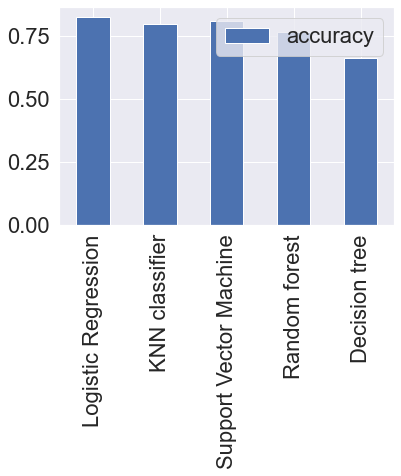

In [72]:
model_compare.T.plot(kind='bar') # (T is here for transpose)


In [73]:
#Let's save the best Model

In [74]:
import pickle 
with open('model_pickle.pkl','wb') as f:
    pickle.dump(lr,f)
with open('model_pickle.pkl','rb') as f:
    mp = pickle.load(f)

In [75]:
Pregnancies=input()
Glucose=input()
BloodPressure=input()
SkinThickness=input()
Insulin=input()
BMI=input()
Age=input()

In [76]:
row_df = pd.DataFrame([pd.Series([Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age])])

In [78]:
print(mp.predict([[6,148,35,0,33.6,50]]))

[1]
